**Aim is to classify chest X-Rays as pneumonic or healthy**


Getting the data

In [1]:
! ! pip install kaggle


In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:17<00:00, 165MB/s]
100% 2.29G/2.29G [00:18<00:00, 137MB/s]


In [6]:
#@title Unzip
! unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [8]:
#getting some useful custom functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-11-21 12:05:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-11-21 12:05:12 (68.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [9]:
#training and test directories 
train_direct = "chest_xray/train"
test_direct = "chest_xray/test"

In [10]:
#creating the datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_data = image_dataset_from_directory(directory = train_direct,
                                          label_mode = "binary",
                                          image_size = (256,256),
                                          batch_size =32 
)
test_data = image_dataset_from_directory(directory = test_direct,
                                         label_mode = "binary",
                                         image_size = (256, 256),
                                         batch_size = 32, shuffle = False

                                         )

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


'person548_bacteria_2299.jpeg'

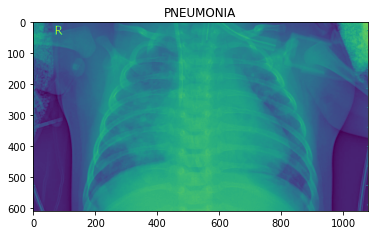

In [11]:
#vistualizing a random image 
direct = "chest_xray/train/"
import os
import random
theclass = random.choice(train_data.class_names)
target_direct = direct + theclass
choice = random.choice(os.listdir(target_direct))
import matplotlib.image as mpimg
image_direct = target_direct + "/" + choice
img = mpimg.imread(image_direct)
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(theclass)
choice

In [12]:
from helper_functions import walk_through_dir

In [ ]:
walk_through_dir("chest_xray")

There are 5 directories and 0 images in 'chest_xray'.
There are 1 directories and 1 images in 'chest_xray/__MACOSX'.
There are 3 directories and 3 images in 'chest_xray/__MACOSX/chest_xray'.
There are 2 directories and 3 images in 'chest_xray/__MACOSX/chest_xray/train'.
There are 0 directories and 1342 images in 'chest_xray/__MACOSX/chest_xray/train/NORMAL'.
There are 0 directories and 3876 images in 'chest_xray/__MACOSX/chest_xray/train/PNEUMONIA'.
There are 2 directories and 1 images in 'chest_xray/__MACOSX/chest_xray/val'.
There are 0 directories and 9 images in 'chest_xray/__MACOSX/chest_xray/val/NORMAL'.
There are 0 directories and 9 images in 'chest_xray/__MACOSX/chest_xray/val/PNEUMONIA'.
There are 2 directories and 3 images in 'chest_xray/__MACOSX/chest_xray/test'.
There are 0 directories and 234 images in 'chest_xray/__MACOSX/chest_xray/test/NORMAL'.
There are 0 directories and 390 images in 'chest_xray/__MACOSX/chest_xray/test/PNEUMONIA'.
There are 2 directories and 0 images 

Simple Convoluted Model

In [13]:
#creating a simple convoluted model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Input,GlobalAveragePooling2D

In [ ]:
model_1 = Sequential()

In [ ]:
#creating model
model_1.add(Conv2D(10,3, activation= "relu", input_shape = (256,256,3)))
model_1.add(Conv2D(10,3, activation = "relu"))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10, 3, activation="relu"))
model_1.add(Conv2D(10,3, activation="relu"))
model_1.add(MaxPooling2D())
model_1.add((Conv2D(10,3, activation="relu")))
model_1.add((Conv2D(10, 3, activation="relu")))
model_1.add(MaxPooling2D())
model_1.add(Flatten())
model_1.add(Dense(1, activation = "sigmoid"))

In [ ]:
model_1.compile(optimizer="adam", loss= "binary_crossentropy", metrics = "accuracy")

In [ ]:
model_1.fit(train_data, 
          epochs = 10, 
          steps_per_epoch= len(train_data), 
          validation_data= test_data,
          validation_steps = len(test_data))               

Epoch 1/10
163/163 [==============================] - 33s 99ms/step - loss: 0.5079 - accuracy: 0.8535 - val_loss: 0.8135 - val_accuracy: 0.7196
Epoch 2/10
163/163 [==============================] - 16s 97ms/step - loss: 0.1380 - accuracy: 0.9469 - val_loss: 0.8385 - val_accuracy: 0.7099
Epoch 3/10
163/163 [==============================] - 17s 98ms/step - loss: 0.0966 - accuracy: 0.9630 - val_loss: 0.6640 - val_accuracy: 0.7997
Epoch 4/10
163/163 [==============================] - 17s 98ms/step - loss: 0.0784 - accuracy: 0.9686 - val_loss: 0.6601 - val_accuracy: 0.7949
Epoch 5/10
163/163 [==============================] - 17s 97ms/step - loss: 0.0635 - accuracy: 0.9766 - val_loss: 1.1278 - val_accuracy: 0.7340
Epoch 6/10
163/163 [==============================] - 17s 98ms/step - loss: 0.0473 - accuracy: 0.9831 - val_loss: 0.8374 - val_accuracy: 0.7804
Epoch 7/10
163/163 [==============================] - 17s 99ms/step - loss: 0.0428 - accuracy: 0.9854 - val_loss: 1.2096 - val_accuracy:

In [14]:
#Simple model with data augmentation 
from tensorflow.keras.layers.experimental import preprocessing

data_aug = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)



], name = "data_aug")

Data Augmentation with simple model

In [ ]:
input = Input(shape=(256,256, 3))
x = data_aug(input)
x = Conv2D(10,3, activation= "relu")(x)
x = Conv2D(10,3, activation= "relu")(x)
x = MaxPooling2D()(x)
x = Conv2D(10,3, activation= "relu")(x)
x = Conv2D(10,3, activation= "relu")(x)
x = MaxPooling2D()(x)
x = Conv2D(10,3, activation= "relu")(x)
x = Conv2D(10,3, activation= "relu")(x)
x = MaxPooling2D()(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)

In [ ]:
model_2 = Model(inputs= input, outputs = output)

In [ ]:
model_2.compile(optimizer="adam", loss= "binary_crossentropy", metrics = "accuracy")
model_2.fit(train_data, 
          epochs = 10, 
          steps_per_epoch= len(train_data), 
          validation_data= test_data,
          validation_steps = len(test_data))   

Epoch 1/10
163/163 [==============================] - 56s 333ms/step - loss: 0.5684 - accuracy: 0.7439 - val_loss: 0.6374 - val_accuracy: 0.6282
Epoch 2/10
163/163 [==============================] - 52s 313ms/step - loss: 0.5141 - accuracy: 0.7558 - val_loss: 0.5555 - val_accuracy: 0.7083
Epoch 3/10
163/163 [==============================] - 48s 287ms/step - loss: 0.4451 - accuracy: 0.7889 - val_loss: 0.5961 - val_accuracy: 0.6891
Epoch 4/10
163/163 [==============================] - 46s 277ms/step - loss: 0.3961 - accuracy: 0.8148 - val_loss: 0.4572 - val_accuracy: 0.7901
Epoch 5/10
163/163 [==============================] - 44s 268ms/step - loss: 0.3915 - accuracy: 0.8232 - val_loss: 0.6317 - val_accuracy: 0.6522
Epoch 6/10
163/163 [==============================] - 44s 265ms/step - loss: 0.3572 - accuracy: 0.8336 - val_loss: 0.4899 - val_accuracy: 0.7997
Epoch 7/10
163/163 [==============================] - 44s 265ms/step - loss: 0.3557 - accuracy: 0.8378 - val_loss: 0.4942 - val_ac

Model 3 pretrained EfficientNetB0

In [15]:
from tensorflow.keras.applications import EfficientNetB0

In [16]:
#downloading pretrained model
base_model = EfficientNetB0(include_top= False)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
input = Input(shape = (256,256,3))
x = base_model(input)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_3 = Model(inputs = input, outputs = output)

In [ ]:
model_3.compile(loss = "binary_crossentropy", optimizer = "adam", metrics= "accuracy")
model_3.fit(train_data, epochs = 10, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps = len(test_data))

Epoch 1/10
163/163 [==============================] - 24s 111ms/step - loss: 0.3380 - accuracy: 0.8495 - val_loss: 0.4526 - val_accuracy: 0.7580
Epoch 2/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1841 - accuracy: 0.9363 - val_loss: 0.4256 - val_accuracy: 0.8013
Epoch 3/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1548 - accuracy: 0.9452 - val_loss: 0.4249 - val_accuracy: 0.8093
Epoch 4/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1334 - accuracy: 0.9548 - val_loss: 0.4517 - val_accuracy: 0.8013
Epoch 5/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1216 - accuracy: 0.9544 - val_loss: 0.4668 - val_accuracy: 0.7933
Epoch 6/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1136 - accuracy: 0.9617 - val_loss: 0.3948 - val_accuracy: 0.8365
Epoch 7/10
163/163 [==============================] - 18s 104ms/step - loss: 0.1097 - accuracy: 0.9620 - val_loss: 0.3995 - val_ac

In [ ]:
model_3.fit(train_data, epochs = 5, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps = len(test_data))

Epoch 1/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0904 - accuracy: 0.9695 - val_loss: 0.3948 - val_accuracy: 0.8429
Epoch 2/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0899 - accuracy: 0.9705 - val_loss: 0.4332 - val_accuracy: 0.8301
Epoch 3/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0847 - accuracy: 0.9720 - val_loss: 0.4180 - val_accuracy: 0.8381
Epoch 4/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0836 - accuracy: 0.9720 - val_loss: 0.3991 - val_accuracy: 0.8413
Epoch 5/5
163/163 [==============================] - 18s 104ms/step - loss: 0.0802 - accuracy: 0.9734 - val_loss: 0.4742 - val_accuracy: 0.8189


Model 4, augmented pretrained

In [ ]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_4 = Model(inputs = input, outputs= output)

In [ ]:
model_4.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [ ]:
model_4.fit(train_data, epochs = 10, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
163/163 [==============================] - 34s 172ms/step - loss: 0.3522 - accuracy: 0.8455 - val_loss: 0.4356 - val_accuracy: 0.8093
Epoch 2/10
163/163 [==============================] - 24s 142ms/step - loss: 0.2335 - accuracy: 0.9118 - val_loss: 0.3854 - val_accuracy: 0.8429
Epoch 3/10
163/163 [==============================] - 23s 135ms/step - loss: 0.2051 - accuracy: 0.9187 - val_loss: 0.3582 - val_accuracy: 0.8574
Epoch 4/10
163/163 [==============================] - 21s 126ms/step - loss: 0.1885 - accuracy: 0.9229 - val_loss: 0.3422 - val_accuracy: 0.8558
Epoch 5/10
163/163 [==============================] - 21s 126ms/step - loss: 0.1828 - accuracy: 0.9310 - val_loss: 0.3272 - val_accuracy: 0.8718
Epoch 6/10
163/163 [==============================] - 20s 120ms/step - loss: 0.1708 - accuracy: 0.9333 - val_loss: 0.3149 - val_accuracy: 0.8718
Epoch 7/10
163/163 [==============================] - 20s 117ms/step - loss: 0.1716 - accuracy: 0.9329 - val_loss: 0.3026 - val_ac

In [ ]:
model_4.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 19s 112ms/step - loss: 0.1451 - accuracy: 0.9463 - val_loss: 0.2865 - val_accuracy: 0.9022
Epoch 2/5
163/163 [==============================] - 19s 111ms/step - loss: 0.1506 - accuracy: 0.9444 - val_loss: 0.2689 - val_accuracy: 0.8974
Epoch 3/5
163/163 [==============================] - 19s 110ms/step - loss: 0.1476 - accuracy: 0.9467 - val_loss: 0.2779 - val_accuracy: 0.8990
Epoch 4/5
163/163 [==============================] - 18s 109ms/step - loss: 0.1361 - accuracy: 0.9471 - val_loss: 0.2664 - val_accuracy: 0.8942
Epoch 5/5
163/163 [==============================] - 19s 110ms/step - loss: 0.1388 - accuracy: 0.9456 - val_loss: 0.2754 - val_accuracy: 0.9006


Model 5, augmented pretrained some layers trainable last 17 layers:


In [17]:
for i in range(220, len(base_model.layers)):
  base_model.layers[i].trainable = True

In [18]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_5 = Model(inputs = input, outputs= output)

In [ ]:
model_5.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")


In [ ]:
model_5.fit(train_data, epochs = 15, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/15
163/163 [==============================] - 25s 115ms/step - loss: 0.3719 - accuracy: 0.8606 - val_loss: 0.4293 - val_accuracy: 0.8077
Epoch 2/15
163/163 [==============================] - 18s 108ms/step - loss: 0.2380 - accuracy: 0.9147 - val_loss: 0.4171 - val_accuracy: 0.8029
Epoch 3/15
163/163 [==============================] - 18s 109ms/step - loss: 0.2173 - accuracy: 0.9153 - val_loss: 0.4022 - val_accuracy: 0.8013
Epoch 4/15
163/163 [==============================] - 19s 109ms/step - loss: 0.1961 - accuracy: 0.9250 - val_loss: 0.3716 - val_accuracy: 0.8301
Epoch 5/15
163/163 [==============================] - 19s 110ms/step - loss: 0.1822 - accuracy: 0.9308 - val_loss: 0.4033 - val_accuracy: 0.7997
Epoch 6/15
163/163 [==============================] - 19s 110ms/step - loss: 0.1878 - accuracy: 0.9300 - val_loss: 0.3553 - val_accuracy: 0.8365
Epoch 7/15
163/163 [==============================] - 18s 108ms/step - loss: 0.1694 - accuracy: 0.9371 - val_loss: 0.3808 - val_ac

Model 6, augmented pretrained some layers trainable last 5 layers





In [ ]:
base_model = EfficientNetB0(include_top= False)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
for i in range(231, len(base_model.layers)):
  base_model.layers[i].trainable = True

In [ ]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_6 = Model(inputs = input, outputs= output)

In [ ]:
model_6.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [ ]:
model_6.fit(train_data, epochs = 15, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/15
163/163 [==============================] - 24s 114ms/step - loss: 0.3796 - accuracy: 0.8491 - val_loss: 0.4297 - val_accuracy: 0.8093
Epoch 2/15
163/163 [==============================] - 18s 107ms/step - loss: 0.2430 - accuracy: 0.9109 - val_loss: 0.3921 - val_accuracy: 0.8253
Epoch 3/15
163/163 [==============================] - 18s 107ms/step - loss: 0.2172 - accuracy: 0.9151 - val_loss: 0.3811 - val_accuracy: 0.8301
Epoch 4/15
163/163 [==============================] - 18s 107ms/step - loss: 0.2016 - accuracy: 0.9225 - val_loss: 0.3753 - val_accuracy: 0.8317
Epoch 5/15
163/163 [==============================] - 18s 107ms/step - loss: 0.1869 - accuracy: 0.9283 - val_loss: 0.3876 - val_accuracy: 0.8093
Epoch 6/15
163/163 [==============================] - 18s 107ms/step - loss: 0.1806 - accuracy: 0.9325 - val_loss: 0.3459 - val_accuracy: 0.8510
Epoch 7/15
163/163 [==============================] - 19s 113ms/step - loss: 0.1811 - accuracy: 0.9294 - val_loss: 0.3468 - val_ac

Model 7, augmented pretrained some layers trainable last  layers


In [ ]:
base_model = EfficientNetB0(include_top= False)
base_model.trainable = False

In [ ]:
base_model.layers[236].trainable = True

In [ ]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_7 = Model(inputs = input, outputs= output)

In [ ]:
model_7.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = "accuracy")

In [ ]:
model_7.fit(train_data, epochs = 15, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/15
163/163 [==============================] - 25s 114ms/step - loss: 0.3749 - accuracy: 0.8305 - val_loss: 0.4444 - val_accuracy: 0.8045
Epoch 2/15
163/163 [==============================] - 18s 107ms/step - loss: 0.2373 - accuracy: 0.9089 - val_loss: 0.3799 - val_accuracy: 0.8381
Epoch 3/15
163/163 [==============================] - 18s 108ms/step - loss: 0.2041 - accuracy: 0.9224 - val_loss: 0.3542 - val_accuracy: 0.8446
Epoch 4/15
163/163 [==============================] - 18s 107ms/step - loss: 0.1839 - accuracy: 0.9325 - val_loss: 0.3296 - val_accuracy: 0.8702
Epoch 5/15
163/163 [==============================] - 18s 106ms/step - loss: 0.1753 - accuracy: 0.9327 - val_loss: 0.3180 - val_accuracy: 0.8750
Epoch 6/15
163/163 [==============================] - 18s 106ms/step - loss: 0.1665 - accuracy: 0.9383 - val_loss: 0.3073 - val_accuracy: 0.8766
Epoch 7/15
163/163 [==============================] - 18s 106ms/step - loss: 0.1676 - accuracy: 0.9365 - val_loss: 0.3149 - val_ac

In [ ]:
model_7.fit(train_data, epochs = 5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 19s 110ms/step - loss: 0.1355 - accuracy: 0.9513 - val_loss: 0.2724 - val_accuracy: 0.9006
Epoch 2/5
163/163 [==============================] - 18s 108ms/step - loss: 0.1371 - accuracy: 0.9459 - val_loss: 0.2817 - val_accuracy: 0.8942
Epoch 3/5
163/163 [==============================] - 18s 109ms/step - loss: 0.1372 - accuracy: 0.9475 - val_loss: 0.3124 - val_accuracy: 0.8766
Epoch 4/5
163/163 [==============================] - 18s 108ms/step - loss: 0.1321 - accuracy: 0.9488 - val_loss: 0.2700 - val_accuracy: 0.8942
Epoch 5/5
163/163 [==============================] - 18s 108ms/step - loss: 0.1319 - accuracy: 0.9507 - val_loss: 0.2639 - val_accuracy: 0.8942


Model 8 Pretrained, weights locked for 5 epochs then trainable for 10

In [19]:
base_model = EfficientNetB0(include_top= False)
base_model.trainable = False

In [20]:
input = Input(shape=(256,256,3))
x = data_aug(input)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation = "sigmoid")(x)
model_8 = Model(inputs = input, outputs = output) 

In [21]:
initial_epochs = 5

In [22]:
model_8.compile(optimizer="adam", loss = "binary_crossentropy", metrics = "accuracy")
model_8.fit(train_data, epochs=initial_epochs, steps_per_epoch=len(train_data), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 54s 186ms/step - loss: 0.3562 - accuracy: 0.8451 - val_loss: 0.4408 - val_accuracy: 0.7901
Epoch 2/5
163/163 [==============================] - 26s 154ms/step - loss: 0.2323 - accuracy: 0.9080 - val_loss: 0.3818 - val_accuracy: 0.8253
Epoch 3/5
163/163 [==============================] - 24s 142ms/step - loss: 0.2004 - accuracy: 0.9210 - val_loss: 0.3600 - val_accuracy: 0.8317
Epoch 4/5
163/163 [==============================] - 23s 134ms/step - loss: 0.1878 - accuracy: 0.9279 - val_loss: 0.3509 - val_accuracy: 0.8654
Epoch 5/5
163/163 [==============================] - 23s 133ms/step - loss: 0.1758 - accuracy: 0.9314 - val_loss: 0.3230 - val_accuracy: 0.8686


In [26]:
model_8.layers[2].layers[::-1][:5]

In [27]:
#making the last 5 layers trainabe o
for layer in model_8.layers[2].layers[::-1][:5]:
 layer.trainable = True

In [28]:
model_8.compile(optimizer="adam", loss = "binary_crossentropy", metrics = "accuracy")

In [29]:
model_8.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/10
163/163 [==============================] - 31s 141ms/step - loss: 0.2073 - accuracy: 0.9233 - val_loss: 0.3137 - val_accuracy: 0.8670
Epoch 2/10
163/163 [==============================] - 22s 129ms/step - loss: 0.1835 - accuracy: 0.9285 - val_loss: 0.3085 - val_accuracy: 0.8718
Epoch 3/10
163/163 [==============================] - 22s 130ms/step - loss: 0.1655 - accuracy: 0.9377 - val_loss: 0.2909 - val_accuracy: 0.8734
Epoch 4/10
163/163 [==============================] - 22s 129ms/step - loss: 0.1627 - accuracy: 0.9367 - val_loss: 0.2831 - val_accuracy: 0.8750
Epoch 5/10
163/163 [==============================] - 22s 127ms/step - loss: 0.1541 - accuracy: 0.9400 - val_loss: 0.2778 - val_accuracy: 0.8766
Epoch 6/10
163/163 [==============================] - 22s 128ms/step - loss: 0.1513 - accuracy: 0.9423 - val_loss: 0.2768 - val_accuracy: 0.8782
Epoch 7/10
163/163 [==============================] - 21s 125ms/step - loss: 0.1574 - accuracy: 0.9377 - val_loss: 0.2687 - val_ac

In [30]:
#More Epochs
model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 21s 125ms/step - loss: 0.1451 - accuracy: 0.9473 - val_loss: 0.2536 - val_accuracy: 0.9022
Epoch 2/5
163/163 [==============================] - 21s 124ms/step - loss: 0.1503 - accuracy: 0.9446 - val_loss: 0.2703 - val_accuracy: 0.8798
Epoch 3/5
163/163 [==============================] - 21s 123ms/step - loss: 0.1349 - accuracy: 0.9509 - val_loss: 0.2783 - val_accuracy: 0.8718
Epoch 4/5
163/163 [==============================] - 21s 124ms/step - loss: 0.1402 - accuracy: 0.9434 - val_loss: 0.2541 - val_accuracy: 0.9006
Epoch 5/5
163/163 [==============================] - 21s 124ms/step - loss: 0.1331 - accuracy: 0.9509 - val_loss: 0.2669 - val_accuracy: 0.8862


#Model 9 Trying EfficientNetB3 Aug



In [31]:
from tensorflow.keras.applications import EfficientNetB3

In [32]:
base_modelB3 = EfficientNetB3(include_top=False)
base_modelB3.trainable = False

43950080/43941136 [==============================] - 0s 0us/step


In [33]:
input = Input(shape = (256,256, 3))
x = data_aug(input)
x = base_modelB3(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation= 'sigmoid')(x)
model_9 = Model(inputs = input, outputs = output)

In [34]:
model_9.compile(optimizer = "adam", loss = "binary_crossentropy", metrics= ['accuracy'])
model_9.fit(train_data, epochs=10, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
163/163 [==============================] - 57s 279ms/step - loss: 0.3409 - accuracy: 0.8579 - val_loss: 0.3580 - val_accuracy: 0.8365
Epoch 2/10
163/163 [==============================] - 39s 234ms/step - loss: 0.2215 - accuracy: 0.9141 - val_loss: 0.2994 - val_accuracy: 0.8862
Epoch 3/10
163/163 [==============================] - 36s 216ms/step - loss: 0.1907 - accuracy: 0.9296 - val_loss: 0.2832 - val_accuracy: 0.8846
Epoch 4/10
163/163 [==============================] - 34s 201ms/step - loss: 0.1780 - accuracy: 0.9321 - val_loss: 0.2672 - val_accuracy: 0.8862
Epoch 5/10
163/163 [==============================] - 33s 197ms/step - loss: 0.1670 - accuracy: 0.9363 - val_loss: 0.2654 - val_accuracy: 0.8926
Epoch 6/10
163/163 [==============================] - 32s 193ms/step - loss: 0.1621 - accuracy: 0.9377 - val_loss: 0.2640 - val_accuracy: 0.8798
Epoch 7/10
163/163 [==============================] - 30s 180ms/step - loss: 0.1536 - accuracy: 0.9431 - val_loss: 0.2472 - val_ac

In [35]:
model_9.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 28s 167ms/step - loss: 0.1386 - accuracy: 0.9457 - val_loss: 0.2460 - val_accuracy: 0.8942
Epoch 2/5
163/163 [==============================] - 29s 170ms/step - loss: 0.1370 - accuracy: 0.9469 - val_loss: 0.2391 - val_accuracy: 0.9038
Epoch 3/5
163/163 [==============================] - 28s 164ms/step - loss: 0.1374 - accuracy: 0.9467 - val_loss: 0.2409 - val_accuracy: 0.9038
Epoch 4/5
163/163 [==============================] - 27s 160ms/step - loss: 0.1368 - accuracy: 0.9467 - val_loss: 0.2406 - val_accuracy: 0.8942
Epoch 5/5
163/163 [==============================] - 28s 165ms/step - loss: 0.1336 - accuracy: 0.9486 - val_loss: 0.2733 - val_accuracy: 0.8782


In [36]:
#the loss seems to continously go down so MORE EPOCHS!!!!!
model_9.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
163/163 [==============================] - 27s 161ms/step - loss: 0.1305 - accuracy: 0.9519 - val_loss: 0.2344 - val_accuracy: 0.9071
Epoch 2/5
163/163 [==============================] - 27s 163ms/step - loss: 0.1288 - accuracy: 0.9459 - val_loss: 0.2400 - val_accuracy: 0.9038
Epoch 3/5
163/163 [==============================] - 26s 152ms/step - loss: 0.1291 - accuracy: 0.9538 - val_loss: 0.2497 - val_accuracy: 0.8942
Epoch 4/5
163/163 [==============================] - 26s 157ms/step - loss: 0.1278 - accuracy: 0.9503 - val_loss: 0.2619 - val_accuracy: 0.8846
Epoch 5/5
163/163 [==============================] - 26s 153ms/step - loss: 0.1225 - accuracy: 0.9525 - val_loss: 0.2384 - val_accuracy: 0.9054


In [ ]:
#Seems to preform slightly better 

In [37]:
model_9.evaluate(test_data)

20/20 [==============================] - 2s 115ms/step - loss: 0.2384 - accuracy: 0.9054


[0.23837406933307648, 0.9054487347602844]

In [38]:
import tensorflow as tf

In [39]:
def test_labeller(test_data):
  #because individual labels are 1 dim vects  
  import numpy as np
  test_label = np.concatenate([y for x, y in test_data], axis=0) 
  test_labels = list(map(int, test_label))
  return test_labels

In [40]:
#predicting
def model_predict(model, test_data):
  y_predicts = tf.round(model_9.predict(test_data))
  y_predicts = list(map(int,y_predicts))
  return y_predicts

In [41]:
y_labels = test_labeller(test_data)

In [42]:
y_predict = model_predict(model_9, test_data)

In [43]:
tf.math.confusion_matrix(y_labels, y_predict)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[192,  42],
       [ 17, 373]], dtype=int32)>

In [44]:
#creating confusion matrix
def creating_confusion(model, test_data):
  def test_labeller(test_data):
  #because individual labels are 1 dim vects  
    import numpy as np
    test_label = np.concatenate([y for x, y in test_data], axis=0) 
    test_labels = list(map(int, test_label))
    return test_labels

  def model_predict(model, test_data):
    import tensorflow as tf 
    y_predicts = tf.round(model_9.predict(test_data))
    y_predicts = list(map(int,y_predicts))
    return y_predicts

  pred = model_predict(model, test_data)
  labels = test_labeller(test_data)
  return tf.math.confusion_matrix(labels, pred)

In [45]:
creating_confusion(model_9, test_data)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[192,  42],
       [ 17, 373]], dtype=int32)>

B3 last 10 layers not trainable for 10 epochs the trainable for 10 (model 10):

In [52]:
input = Input(shape = (256,256,3))
x = data_aug(input)
x = base_modelB3(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation= "sigmoid")(x)
 
#intial training epochs
intial_epochs = 10

model_10 = Model(inputs = input, outputs = output)
model_10.compile(optimizer = "adam", 
                 loss = "binary_crossentropy",
                 metrics = "accuracy")
model_10.fit(train_data, 
                 epochs = intial_epochs, 
                 steps_per_epoch = len(train_data), 
                 validation_data = test_data, 
                 validation_steps = len(test_data) )


Epoch 1/10
163/163 [==============================] - 37s 155ms/step - loss: 0.3873 - accuracy: 0.8459 - val_loss: 0.4420 - val_accuracy: 0.8077
Epoch 2/10
163/163 [==============================] - 24s 140ms/step - loss: 0.2485 - accuracy: 0.9164 - val_loss: 0.3680 - val_accuracy: 0.8622
Epoch 3/10
163/163 [==============================] - 24s 140ms/step - loss: 0.2229 - accuracy: 0.9204 - val_loss: 0.3625 - val_accuracy: 0.8670
Epoch 4/10
163/163 [==============================] - 23s 137ms/step - loss: 0.2064 - accuracy: 0.9268 - val_loss: 0.3808 - val_accuracy: 0.8413
Epoch 5/10
163/163 [==============================] - 23s 137ms/step - loss: 0.1916 - accuracy: 0.9300 - val_loss: 0.3698 - val_accuracy: 0.8413
Epoch 6/10
163/163 [==============================] - 24s 140ms/step - loss: 0.1846 - accuracy: 0.9300 - val_loss: 0.3371 - val_accuracy: 0.8622
Epoch 7/10
163/163 [==============================] - 23s 138ms/step - loss: 0.1720 - accuracy: 0.9387 - val_loss: 0.3119 - val_ac

In [53]:
#changing last layers to trainable
for layer in model_10.layers[2].layers[::-1][:10]:
  layer.trainable = True
model_10.compile(optimizer = "adam", 
                 loss = "binary_crossentropy",
                 metrics = "accuracy")

In [54]:
#loss seems to still be imporoving will run for MORE epochs
#Doesnt seem to help
model_10.fit(train_data, 
                 epochs = 10, 
                 steps_per_epoch = len(train_data), 
                 validation_data = test_data, 
                 validation_steps = len(test_data) )

Epoch 1/10
163/163 [==============================] - 37s 151ms/step - loss: 0.1648 - accuracy: 0.9354 - val_loss: 0.3126 - val_accuracy: 0.8670
Epoch 2/10
163/163 [==============================] - 23s 136ms/step - loss: 0.1665 - accuracy: 0.9358 - val_loss: 0.3349 - val_accuracy: 0.8590
Epoch 3/10
163/163 [==============================] - 23s 133ms/step - loss: 0.1560 - accuracy: 0.9457 - val_loss: 0.3181 - val_accuracy: 0.8670
Epoch 4/10
163/163 [==============================] - 23s 137ms/step - loss: 0.1529 - accuracy: 0.9450 - val_loss: 0.3041 - val_accuracy: 0.8718
Epoch 5/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1520 - accuracy: 0.9431 - val_loss: 0.2888 - val_accuracy: 0.8798
Epoch 6/10
163/163 [==============================] - 23s 135ms/step - loss: 0.1457 - accuracy: 0.9442 - val_loss: 0.2810 - val_accuracy: 0.8846
Epoch 7/10
163/163 [==============================] - 23s 134ms/step - loss: 0.1588 - accuracy: 0.9379 - val_loss: 0.2778 - val_ac

In [ ]:
#

EfficienetB7 Data Aug model 11

In [ ]:
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
base_modelB7 = EfficientNetB7(include_top=False)
base_modelB7.trainable = False

In [ ]:
input = Input(shape = (256,256,3))
x = data_aug(input)
x = base_modelB7(x)
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation= "sigmoid")(x)
model_11 = Model(inputs= input, outputs =output)

In [ ]:
model_11.compile(optimizer = "adam", 
                 loss = "binary_crossentropy",
                 metrics = "accuracy")
model_11.fit(train_data, 
                 epochs = 10, 
                 steps_per_epoch = len(train_data), 
                 validation_data = test_data, 
                 validation_steps = len(test_data) )

Epoch 1/10
163/163 [==============================] - 109s 522ms/step - loss: 0.3348 - accuracy: 0.8616 - val_loss: 0.3957 - val_accuracy: 0.8349
Epoch 2/10
163/163 [==============================] - 73s 440ms/step - loss: 0.2137 - accuracy: 0.9170 - val_loss: 0.3634 - val_accuracy: 0.8462
Epoch 3/10
163/163 [==============================] - 71s 431ms/step - loss: 0.1904 - accuracy: 0.9268 - val_loss: 0.3214 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 69s 415ms/step - loss: 0.1776 - accuracy: 0.9312 - val_loss: 0.3195 - val_accuracy: 0.8686
Epoch 5/10
163/163 [==============================] - 67s 403ms/step - loss: 0.1732 - accuracy: 0.9329 - val_loss: 0.3155 - val_accuracy: 0.8702
Epoch 6/10
163/163 [==============================] - 65s 395ms/step - loss: 0.1664 - accuracy: 0.9381 - val_loss: 0.3409 - val_accuracy: 0.8462
Epoch 7/10
163/163 [==============================] - 63s 382ms/step - loss: 0.1571 - accuracy: 0.9404 - val_loss: 0.2998 - val_a

In [ ]:
#seems to be overfitting 